<a href="https://colab.research.google.com/github/UberEth/Covid-Analysis-Colab/blob/master/Copy_of_git_update_death_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook pulls COVID case, death and hospitalization data over time

It clones the repo of johns hopkins data from https://github.com/CSSEGISandData/COVID-19 and the repo of hospitalization data from: https://github.com/COVID19Tracking




In [0]:
### Clone Johns Hopkins / Atlantic data

!rm -r 'COVID-19'
!git clone https://github.com/CSSEGISandData/COVID-19.git || (cd COVID-19 ; git pull)
!pwd

!rm -r 'covid-tracking-data'
!git clone https://github.com/COVID19Tracking/covid-tracking-data.git || (cd COVID-19-Hospital ; git pull)

!ls -al
!ls /content/covid-tracking-data

import warnings
warnings.filterwarnings('ignore')

#Data Engineering step - pop first 2 lines of cdc.csv file
!tail -n -62 covid-tracking-data/data/cdc.csv > covid-tracking-data/data/cdc2.csv


In [0]:
# Setup Python Environment
import io, pandas as pd, matplotlib.pyplot as plt, datetime as dt, numpy as np

# Function Library
def print_details(name='Data Source Details', df=''):
    
    f = open('/content/workfile','w+')  
    print("---------------------------------------------------------------------")
    print("------- ", name)
    print("---------------------------------------------------------------------")

    md_buffer = df.to_markdown() 
    f.write(md_buffer)
    f.close()

    !head -20 '/content/workfile'
    print(df.columns)
    print("\n\n")
    
    !rm /content/workfile


In [103]:
                                               # Set Analytics Max Date
print(dt.datetime.now())
yesterday = dt.datetime.now() - dt.timedelta(days=1)
yesterday_csv = yesterday.strftime("%m-%d-%Y") + ".csv"
print("Yesterday's Date: {0}, CSV FILE: {1}".format(yesterday,yesterday_csv))
print('\n\n\n\n')

verbose = True
transpose = False
sums = False

# Import Hopkins COVID Data Sets
# Global JH Time Series Detail
global_deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
global_confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# Create Transpose(s)
G_D_T = global_deaths.T
G_D_C = global_confirmed.T
if verbose: print_details('Global Deaths', global_deaths)
if verbose: print_details('Global Confirmed', global_confirmed)
if transpose: print_details('Tranpose of Global Deaths', G_D_T)
if transpose: print_details('Transpose of Global Confirmed', G_D_C)

# US JH Time Series Detail
US_deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
US_confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
# Create Transpose(s)
US_D_T = US_deaths.T
US_C_T = US_confirmed.T
if verbose: print_details('US Deaths',US_deaths)
if verbose: print_details('US Confirmed', US_confirmed)
if transpose: print_details('Transpose of US Deaths',US_DAY_T)
if transpose: print_details('Transpose of US Confirmed', US_C_T)

# Yesterday's Daily Data Sets
# Global JH Daily Data
global_daily = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + yesterday_csv)
global_daily.rename(columns={"Admin2":"County/Sector","Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)
# Create Transpose
G_DAY_T = global_daily.T
if verbose: print_details('Global Daily Data deaths/confirmed', global_daily)
if transpose: print_details('Transpose of Global Daily', G_DAY_T)

# US JH Daily Data
US_daily = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/" + yesterday_csv)
US_daily.rename(columns={"Admin2":"County/Sector","Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)
# Create Transpose
US_DAY_T = US_daily.T
if verbose: print_details('US Daily Data deaths/confirmed', US_daily)
if transpose: print_details('Transpose of US Daily Data', US_DAY_T)

# Summarize JH Global Time Series Date
global_deaths_sum = global_deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
global_confirmed_sum = global_confirmed.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
# Create Transpose(s)
G_D_S_T = global_deaths_sum.T
G_C_S_T = global_confirmed_sum.T
if sums: print_details('Global Deaths Summarized', global_deaths_sum)
if sums: print_details('Global Confirmed Summarized', global_confirmed_sum)
if transpose: print_details('Transpose of Global Deaths Summarized', G_D_S_T)
if transpose: print_details('Transpose of Global Confirmed Summarized',G_C_S_T) 

# Group JH US Time Series by State, Date
US_deaths_by_state_sum = US_deaths.drop(["Lat", "Long_", 'UID', 'code3', "FIPS", "iso2", "iso3"], axis=1).groupby(["Country_Region","Province_State"]).sum()
US_confirmed_by_state_sum = US_confirmed.drop(["Lat", "Long_", "UID", "code3", "FIPS", "iso2", "iso3"], axis=1).groupby(["Country_Region", "Province_State"]).sum()
# Create Transpose(s)
US_D_STATE_T = US_deaths_by_state.T
US_C_STATE_T = US_confirmed_by_state.T
if sums: print_details('US Deaths Summarized', US_deaths_by_state_sum)
if sums: print_details('US Confirmed Summarized', US_confirmed_by_state_sum)
if transpose: print_details('Transpose of US Deaths Summarized', US_D_STATE_T)
if transpose: print_details('Transpose of US Confirmed Summarized', US_C_STATE_T) 

# Group JH US Time Series by State, County, Date
US_deaths_by_state_county_sum = US_deaths.drop(["Lat", "Long_", 'UID', 'code3', "FIPS", "iso2", "iso3"], axis=1).groupby(["Country_Region","Province_State", "Admin2"]).sum()
US_confirmed_by_state_county_sum = US_confirmed.drop(["Lat", "Long_", "UID", "code3", "FIPS", "iso2", "iso3"], axis=1).groupby(["Country_Region", "Province_State", "Admin2"]).sum()
# Create Transpose(s)
US_D_STATE_CTY_T = US_deaths_by_state_county.T
US_C_STATE_CTY_T = US_confirmed_by_state_county.T
if sums: print_details('US Deaths by State/County Summarized', US_deaths_by_state_county_sum)
if sums: print_details('US Confirmed by State/County Summarized',US_confirmed_by_state_county_sum)
if transpose: print_details('Transpose of US Deaths State/County Summarized',US_D_STATE_CTY_T)
if transpose: print_details('Transpose of US Confirmed State/County Summarized', US_C_STATE_CTY_T) 

# ------------------------------------------------------------------
# COVID Data Project Loads - COVID Hospitalization Data US
# __________________________________________________________________

cdc_daily = pd.read_csv("covid-tracking-data/data/cdc2.csv")
if verbose: print_details('CDC Daily Statistics', cdc_daily)

# county data feed is broken
# county_hosp = pd.read_csv("covid-tracking-data/data/counties.csv")
# if verbose: print(county_hosp)

states_current_hosp = pd.read_csv("covid-tracking-data/data/states_current.csv")
if verbose: print_details('US States Current Hospitalization', states_current_hosp)
states_daily_hosp = pd.read_csv("covid-tracking-data/data/states_daily_4pm_et.csv")
if verbose: print_details('US States Daily Hospitalization',states_daily_hosp)
states_info_hosp = pd.read_csv("covid-tracking-data/data/states_info.csv")
if verbose: print_details('US States Hospitalization Info',states_info_hosp)
us_current_hosp = pd.read_csv("covid-tracking-data/data/us_current.csv")
if verbose: print_details('US Current Hospitalization', us_current_hosp)
us_daily_hosp = pd.read_csv("covid-tracking-data/data/us_daily.csv")
if verbose: print_details('US Daily Hospitalization', us_daily_hosp)


2020-06-11 18:38:11.352444
Yesterday's Date: 2020-06-10 18:38:11.352651, CSV FILE: 06-10-2020.csv





---------------------------------------------------------------------
-------  Global Deaths
---------------------------------------------------------------------
|     | Province/State                   | Country/Region                   |       Lat |       Long |   1/22/20 |   1/23/20 |   1/24/20 |   1/25/20 |   1/26/20 |   1/27/20 |   1/28/20 |   1/29/20 |   1/30/20 |   1/31/20 |   2/1/20 |   2/2/20 |   2/3/20 |   2/4/20 |   2/5/20 |   2/6/20 |   2/7/20 |   2/8/20 |   2/9/20 |   2/10/20 |   2/11/20 |   2/12/20 |   2/13/20 |   2/14/20 |   2/15/20 |   2/16/20 |   2/17/20 |   2/18/20 |   2/19/20 |   2/20/20 |   2/21/20 |   2/22/20 |   2/23/20 |   2/24/20 |   2/25/20 |   2/26/20 |   2/27/20 |   2/28/20 |   2/29/20 |   3/1/20 |   3/2/20 |   3/3/20 |   3/4/20 |   3/5/20 |   3/6/20 |   3/7/20 |   3/8/20 |   3/9/20 |   3/10/20 |   3/11/20 |   3/12/20 |   3/13/20 |   3/14/20 |   3/15/20 |  

## Comparing the correlation of daily deaths to confirmed

K, so if we look at where the daily deaths correlate to confirmed/deaths, there's now a 5-10 day lag between daily deaths and daily confirmed.

The guestimate are now consistantly underestimating cumulative deaths, which indicates that testing is finally improving (or that deaths are being more-under reported this week than normal). For a while, they were not underestimating deaths and that was not a good sign.

In [0]:
# Set Analytics Max Date
print(dt.datetime.now())
yesterday = dt.datetime.now() - timedelta(days=1)
yesterday_csv = yesterday.strftime("%m-%d-%Y") + ".csv"
print("Yesterday's Date: {0}, CSV FILE: {1}".format(yesterday,yesterday_csv))
print('\n')

# Import Data Sets Once
# Global Time Sereis
global_deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
global_confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
global_deaths_T = global_deaths_df.T
global_confirmed_T = global_confirmed_df.T

# US Time Series
US_deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
US_confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
US_deaths_T = US_deaths.T
US_confirmed_T = US_confirmed.T

# Yesterday's Daily Data Sets
# Global Daily
global_daily = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + yesterday_csv)
global_daily.rename(columns={"Admin2":"County/Sector","Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)
# Global US
US_daily = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/" + yesterday_csv)
US_daily.rename(columns={"Admin2":"County/Sector","Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)


deaths_sum = deaths_df.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
confirmed_sum = confirmed_df.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

deaths_sum_by_state = deaths_df.drop(["Lat", "Long"], axis=1).groupby(["Country/Region","Province/State"]).sum()
confirmed_sum_by_state = confirmed_df.drop(["Lat", "Long"], axis=1).groupby(["Country/Region", "Province/State"]).sum()

deaths_sum_T = deaths_sum.T
confirmed_sum_T = confirmed_sum.T

deaths_sum_by_state_T = deaths_sum_by_state.T
confirmed_sum_by_state_T = confirmed_sum_by_state.T

covid_daily = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
covid_daily.rename(columns={"Admin2":"County/Sector","Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)
print(covid_daily.columns)
print(covid_daily)

# print(death_sum_T)
# print(confirmed_sum_T)
# print(covid_daily)
# print(covid_daily.columns)

# Nation, Deaths, Confirmed by Date
nations = {}
for nation in deaths_sum_T.columns:
  nations[nation] = deaths_sum_T[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed_sum_T[nation]

#US , Deaths, Confirmed by Date
US_deaths_confirmed_by_day = nations["US"][["deaths", "confirmed"]]

# States, Deaths, Confirmed by Date
states = {}
for states in deaths_sum_by_state_T.columns:
  nations[nation] = deaths_sum_T[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed_sum_T[nation]





2020-06-10 19:02:53.099165
Yesterday's Date: 2020-06-09 19:02:53.099342, CSV FILE: 06-09-2020.csv




NameError: ignored

In [0]:
import pandas as pd, matplotlib.pyplot as plt, datetime as dt, numpy as np


            deaths  confirmed
2020-01-22       0          1
2020-01-23       0          1
2020-01-24       0          2
2020-01-25       0          2
2020-01-26       0          5
...            ...        ...
2020-06-05  109359    1902632
2020-06-06  110068    1925765
2020-06-07  110511    1943882
2020-06-08  111011    1961428
2020-06-09  111989    1973230

[140 rows x 2 columns]


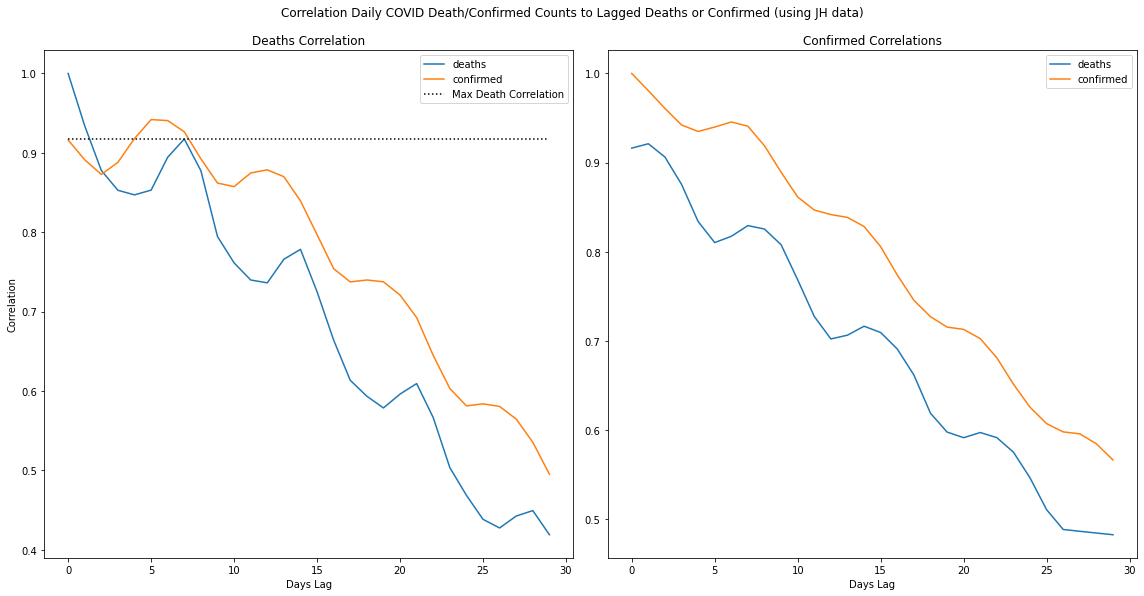

In [0]:
deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

deaths = deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
confirmed = confirmed.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

deaths = deaths.T
confirmed = confirmed.T

nations = {}
for nation in deaths.columns:
  nations[nation] = deaths[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed[nation]

#only show US numbers
tmp = nations["US"][["deaths", "confirmed"]]
tmp.index = pd.to_datetime(tmp.index)

print(tmp)

my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)

corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

  confirmed_corrs.loc()[i, "deaths"] = corr_df.loc()["confirmed", "deaths_lag_{}".format(i)]
  confirmed_corrs.loc()[i, "confirmed"] = corr_df.loc()["confirmed", "confirmed_lag_{}".format(i)]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")

death_corrs.plot(title="Deaths Correlation", ax=ax1)
death_corrs["cutoff"] = death_corrs[2:].deaths.max()
death_corrs["cutoff"].plot(ax=ax1, c="black", style=":", label="Max Death Correlation")
ax1.set_xlabel("Days Lag")
ax1.set_ylabel("Correlation")

ax1.legend()

confirmed_corrs.plot(title="Confirmed Correlations", ax=ax2)
ax2.set_xlabel("Days Lag")
fig.suptitle("Correlation Daily COVID Death/Confirmed Counts to Lagged Deaths or Confirmed (using JH data)", y=1.03)
fig.tight_layout()


In [0]:
tmp.index.max()

Timestamp('2020-06-09 00:00:00')

In [0]:
max_correlation_days_lag = death_corrs[["confirmed"]].idxmax()[0]

In [0]:
max_correlation_days_lag

5

#So since it correlates, can we extrapolate forward?

In [0]:
## so let's be super lazy and just take the lag from max correlation as how far we can look ahead, then go and do that!
##(It would do better with moving average, but that's another issue)

#pretty sure I messed up the math a bit somewhere so it's off by a day probably

    Province/State         Country/Region        Lat  ...  6/7/20  6/8/20  6/9/20
0              NaN            Afghanistan  33.000000  ...   20342   20917   21459
1              NaN                Albania  41.153300  ...    1246    1263    1299
2              NaN                Algeria  28.033900  ...   10154   10265   10382
3              NaN                Andorra  42.506300  ...     852     852     852
4              NaN                 Angola -11.202700  ...      91      92      96
..             ...                    ...        ...  ...     ...     ...     ...
261            NaN  Sao Tome and Principe   0.186360  ...     513     513     514
262            NaN                  Yemen  15.552727  ...     484     496     524
263            NaN                Comoros -11.645500  ...     141     141     141
264            NaN             Tajikistan  38.861034  ...    4529    4609    4690
265            NaN                Lesotho -29.609988  ...       4       4       4

[266 rows x 144

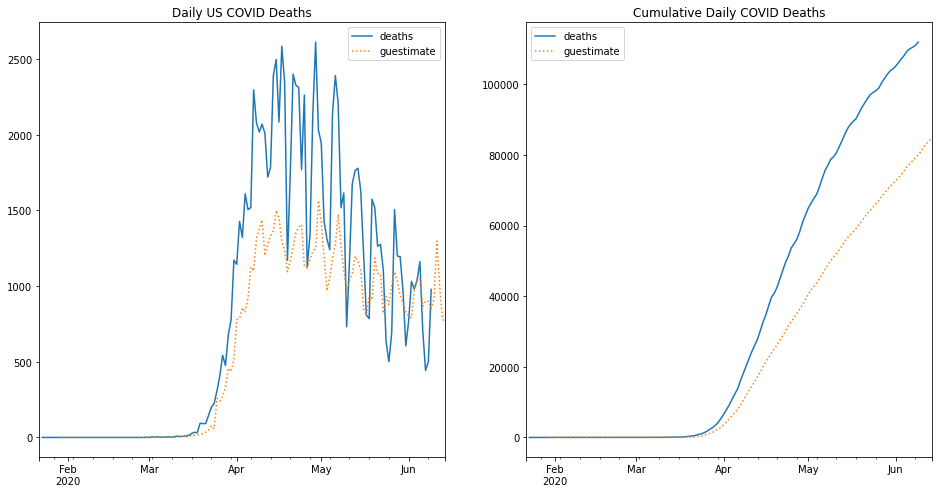

,deaths,guestimate
2020-06-09,111989.0,80093.625429
2020-06-10,NaN,81008.106589
2020-06-11,NaN,82304.645345
2020-06-12,NaN,83305.340362
2020-06-13,NaN,84089.051581
2020-06-14,NaN,84848.062291


In [0]:

deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

print(confirmed)

deaths = deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
confirmed = confirmed.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

deaths = deaths.T
confirmed = confirmed.T

nations = {}
for nation in deaths.columns:
  nations[nation] = deaths[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed[nation]

tmp = nations["US"][["deaths", "confirmed"]]

my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)

corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]].plot(ax=ax1, style=["-", ":"], title="Daily US COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

comparison = daily_deaths.copy() #will use this later

In [0]:
mean_ratio

0.04347072112164656

Would this have worked for last 10 day? Let's go back in time and find out!

And the answer is, it overshoots by a bit! probably because the testing's been increasing on non-covid maybe?

I feel like doing some stuff with a MA window might improve this to get past some of the noise, but I gotta get back to working on my thesis edits

,0 Days Ago,1 Days Ago,2 Days Ago,3 Days Ago,4 Days Ago,5 Days Ago,6 Days Ago
CumErrorRatio Yesterday (By Guestimate Ratio Date),-26.7%,-23.9%,-22.6%,-22.3%,-21.7%,-18.4%,-15.8%


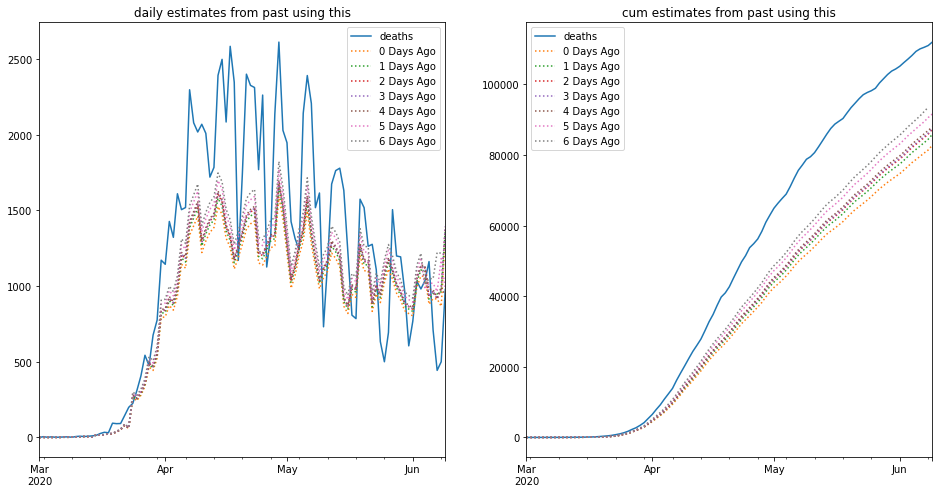

In [0]:
import datetime

tmp.index=pd.to_datetime(tmp.index)

daily_deaths_original = tmp.diff()
daily_deaths_compare = tmp.diff()[["deaths"]]

daily_deaths_original.index = pd.to_datetime(daily_deaths_original.index)

for j in range(7):
  daily_deaths = daily_deaths_original[:-1-j]
  #print(len(daily_deaths))
  mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag])) for i in range(1,21)])
  #print(mean_ratio)
  daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
  startForecast = daily_deaths.index.max()
  cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
  for forecast in range(1,7):
    daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag]
  daily_deaths_compare["{} Days Ago".format(j)] = daily_deaths["guestimate"]
  #daily_deaths[["deaths", "guestimate"]].plot(title=j)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")

markers = ["-"] + [":" for x in range(7)]

daily_deaths_compare[daily_deaths_compare.index >= datetime.datetime(2020,3,1)].plot(ax=ax1, style=markers, title="daily estimates from past using this")
daily_deaths_compare.cumsum()[daily_deaths_compare.index >= datetime.datetime(2020,3,1)].plot(ax=ax2, style=markers, title="cum estimates from past using this")

final_compare = daily_deaths_compare.cumsum()[-2:-1]
idx = final_compare.index[-1]
ratio_df = pd.DataFrame()

for col in daily_deaths_compare.columns:
  if col == "deaths":
    continue
  ratio_df.at["CumErrorRatio Yesterday (By Guestimate Ratio Date)", col] = np.round(100*(final_compare.at[idx, col]-final_compare.at[idx, "deaths"])/final_compare.at[idx, "deaths"],1).astype("str")+"%"

display(ratio_df)


#Comparing deaths by country after hitting 200 deaths

Below is the 5 day moving average for the percent change in total deaths by country on the nth day after hitting 200 deaths. The United States and France are not going the right direction here. Oh, wait, why did I keep log scale? asdf

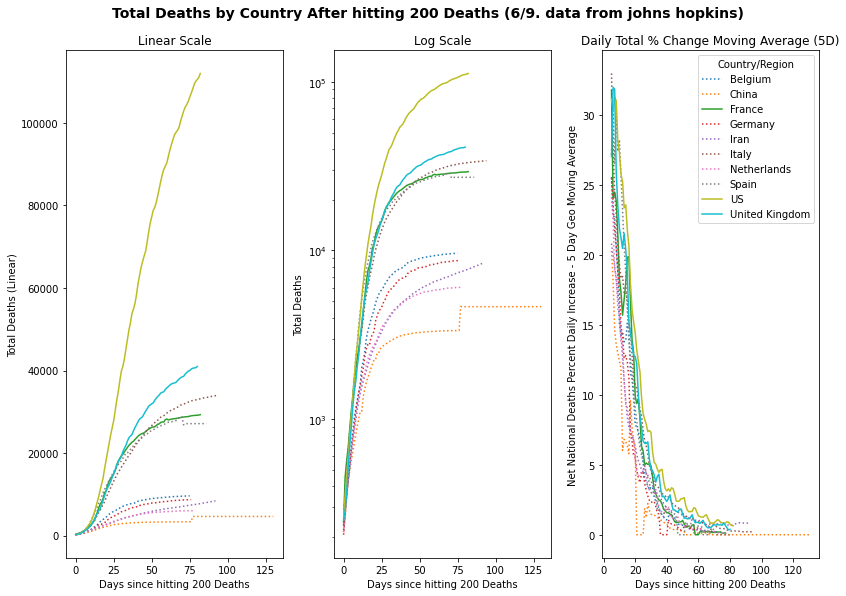

In [0]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from scipy.stats.mstats import gmean

fig, [ax1, ax2, ax3] = plt.subplots(nrows = 1, ncols =3, figsize=(12,8), facecolor="w")

country_deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
country_deaths = country_deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
country_deaths = country_deaths[country_deaths["3/28/20"] > 300]
country_deaths = country_deaths.T
country_percent_deaths = (country_deaths.diff()/country_deaths.shift())

for country in country_deaths.columns:
    df = country_deaths[[country]]
    df = df[df[country] > 200]
    df = 100*(df.diff()/df.shift())
    df = df.rolling(5).agg(gmean).dropna()
    if len(df) < 3:
        continue
    #df = df.dropna()


    style = ":"
    if country == "US" or country == "France" or country== "United Kingdom":
      style = "-"


    df.index = range(5, len(df)+5)
    df.plot(ax=ax3, style=style)
    df = country_deaths[[country]]
    df = df[df[country] >= 200]
    df.index = range(len(df))

    df.plot(ax=ax1, style=style, logy=False)

    df.plot(ax=ax2, style=style, logy=True)

ax1.get_legend().remove()
ax2.get_legend().remove()

ax1.set_ylabel("Total Deaths (Linear)")
ax2.set_ylabel("Total Deaths")
ax3.set_ylabel("Net National Deaths Percent Daily Increase - 5 Day Geo Moving Average")

ax1.set_xlabel("Days since hitting 200 Deaths")
ax2.set_xlabel("Days since hitting 200 Deaths")
ax3.set_xlabel("Days since hitting 200 Deaths")

ax1.set_title("Linear Scale")
ax2.set_title("Log Scale")
ax3.set_title("Daily Total % Change Moving Average (5D)")

fig.suptitle("Total Deaths by Country After hitting 200 Deaths ({}. data from johns hopkins)".format("/".join(country_deaths.index[-1].split("/")[:2])), y=1.03, fontsize=14, weight="bold")
fig.tight_layout()
plt.show()


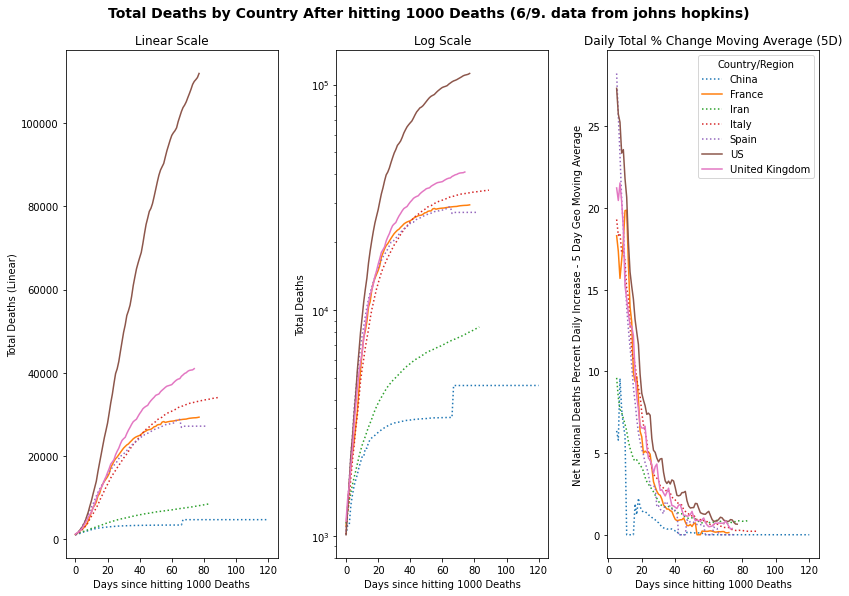

Country/Region,US
6/7/20,110511
6/8/20,111011
6/9/20,111989


In [0]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from scipy.stats.mstats import gmean

fig, [ax1, ax2, ax3] = plt.subplots(nrows = 1, ncols =3, figsize=(12,8), facecolor="w")

country_deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
country_deaths = country_deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
country_deaths = country_deaths[country_deaths["3/23/20"] > 300]
country_deaths = country_deaths.T
country_percent_deaths = (country_deaths.diff()/country_deaths.shift())

for country in country_deaths.columns:
    df = country_deaths[[country]]
    df = df[df[country] > 1000]
    df = 100*(df.diff()/df.shift())
    df = df.rolling(5).agg(gmean).dropna()
    if len(df) < 3:
        continue
    #df = df.dropna()


    style = ":"
    if country == "US" or country == "France" or country== "United Kingdom":
      style = "-"


    df.index = range(5, len(df)+5)
    df.plot(ax=ax3, style=style)
    df = country_deaths[[country]]
    df = df[df[country] >= 1000]
    df.index = range(len(df))

    df.plot(ax=ax1, style=style, logy=False)

    df.plot(ax=ax2, style=style, logy=True)

ax1.get_legend().remove()
ax2.get_legend().remove()

ax1.set_ylabel("Total Deaths (Linear)")
ax2.set_ylabel("Total Deaths")
ax3.set_ylabel("Net National Deaths Percent Daily Increase - 5 Day Geo Moving Average")

ax1.set_xlabel("Days since hitting 1000 Deaths")
ax2.set_xlabel("Days since hitting 1000 Deaths")
ax3.set_xlabel("Days since hitting 1000 Deaths")

ax1.set_title("Linear Scale")
ax2.set_title("Log Scale")
ax3.set_title("Daily Total % Change Moving Average (5D)")

fig.suptitle("Total Deaths by Country After hitting 1000 Deaths ({}. data from johns hopkins)".format("/".join(country_deaths.index[-1].split("/")[:2])), y=1.03, fontsize=14, weight="bold")
fig.tight_layout()
plt.show()

display(country_deaths[["US"]][-3:])    


# What if we exclude new york?

2020-06-10 16:06:21.637052
06-09-2020.csv


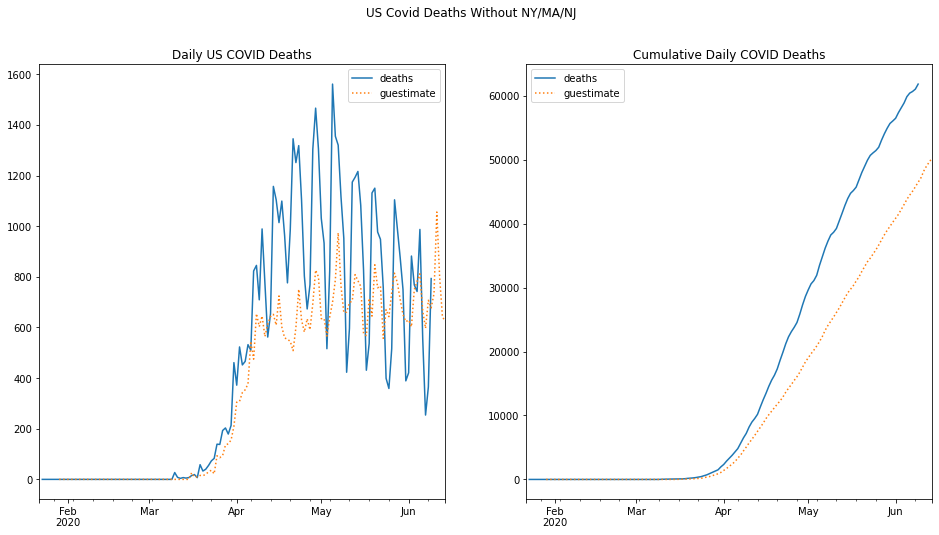

,deaths,guestimate
2020-06-09,61820.0,46440.729443
2020-06-10,NaN,47173.780188
2020-06-11,NaN,48229.680883
2020-06-12,NaN,49029.076949
2020-06-13,NaN,49670.300261
2020-06-14,NaN,50294.841590


In [0]:
import os
from datetime import timedelta


df = pd.DataFrame()

# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"


tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

noreast = ["New York", "Massachusetts", "New Jersey"]
targets = [x for x in tmp[(tmp["Country/Region"] == "US")]["Province/State"].unique() if x not in noreast]

tmp = tmp[tmp["Province/State"].isin(targets)]

df.loc[x[:-4], "deaths"] = tmp[(tmp["Country/Region"] == "US")]["Deaths"].sum()
df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()


for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
  if not x.endswith("2020.csv"):
      continue
  try:
    tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
  except:
    pass
  tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

  tmp = tmp[tmp["Province/State"].isin(targets)]

  df.loc[x[:-4], "deaths"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
  df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()

df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

tmp = df.copy()


my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]].idxmax()[0]

daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]].plot(ax=ax1, style=["-", ":"], title="Daily US COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("US Covid Deaths Without NY/MA/NJ")

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

They say there's lies, damned lies, and statistics. On the one hand, we could look at how the deaths look as a proportion of the total country population, but that's not what this is measuring so I'm not going to include here, but it begs the question what this is measuring.

The death rate is a signal of policy response to COVID. There's two situations to consider.

Situation 1: Everyone in each counry gets infected.

If everyone in the country's going to get infected, then looking at deaths as a proportion of overall country population does make sense (once deaths exceed noise). So like... if a country of 1M pop has 1k deaths and a country of 10M pop has 2k deaths and both had 100% infection, one can argue the 10M pop country policies were better because lesss % died.

Situation 2: Not everyone infected.

If we don't want everyone infected, then the overall country population matters less. The goal's to limit the spread of the virus, where getting to [situation 1] is a failure of policy. In the situation of limiting spread, more cases = worse policy regardless of overall population. So here, we look at effectiveness of policy as being lower rate of spread or lower overall people infected, where lower rate of spread is generally going to be associated with less people infected (and dead) unless the virus dissappears. Population's just a ceiling for max possible infections, in which case we're in situation 1 (albeit density, which is related to population, probably does matter).

Right now, conservative politicians are trying to swing this response as a success despite the US allowing this thing to spread out of control. For what it's worth, I dont think this is new; I argued via the Marine Corps Gazette a few years back (https://mca-marines.org/wp-content/uploads/The-Application-of-Maneuver-Toward-Psychology.pdf) that the fact that we didn't even speak the local language in Afghanistan (I do speak it) was indicative that US policy was completely detached from reality, and I think we're seeing similar detachment applied here in the US. The lack of understanding of the situation of Afghanistan due to not speaking the local language is similar to the lack of understanding of the scope of the COVID problem in the US due to a lack of testing.

#US Data - looking at national and by-state doubling times

this generates linear and log graphs of US death rates (need to run the code in the next block that defins run() first)

2020-06-10 16:06:24.655842
06-09-2020.csv


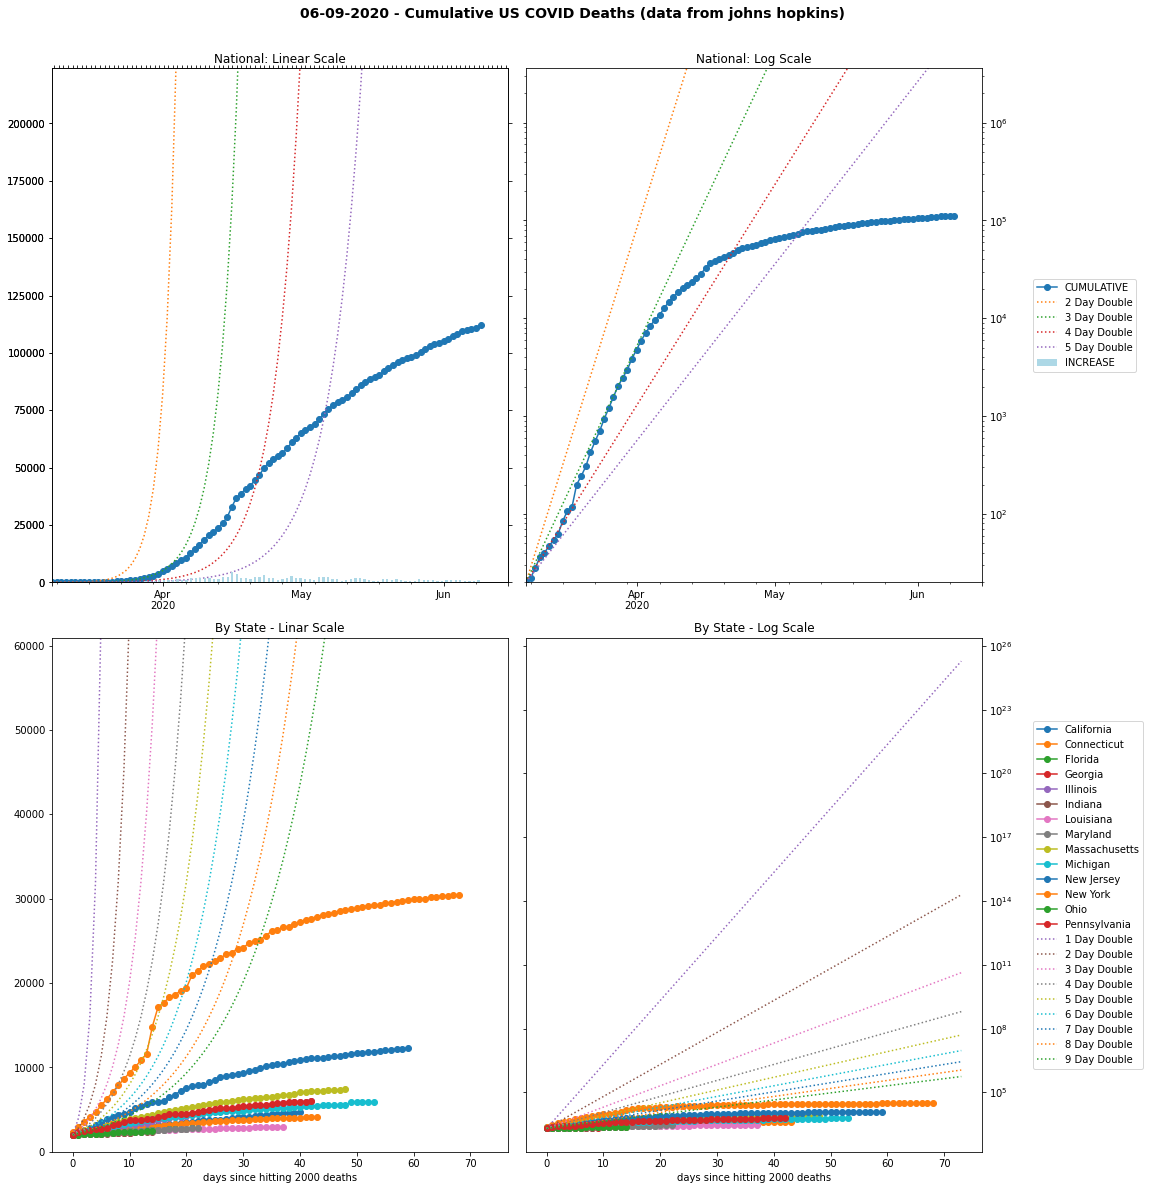



last run: 2020-06-10 16:06:30.213171 UTC


Province/State,California,Connecticut,Florida,Georgia,Illinois,Indiana,Louisiana,Maryland,Massachusetts,Michigan,New Jersey,New York,Ohio,Pennsylvania
06-09-2020,4745.0 (+88.0),4097.0 (+13.0),2765.0 (+53.0),2285.0 (+77.0),6018.0 (+94.0),2339.0 (+23.0),2957.0 (+13.0),2811.0 (+35.0),7408.0 (+55.0),5943.0 (+27.0),12303.0 (+89.0),30458.0 (+41.0),2423.0 (+17.0),6014.0 (+61.0)


,CUMULATIVE
2020-06-02,106180.0
2020-06-03,107175.0
2020-06-04,108211.0
2020-06-05,109373.0
2020-06-06,110083.0
2020-06-07,110528.0
2020-06-08,111011.0
2020-06-09,111989.0


In [0]:
"""

K, so this got a bit long but I'm combining it with the function call, just setting the DEATH_CUTOFF to
1000 as threshhold here which gets used below

"""
DEATH_CUTOFF = 2000

import matplotlib.pyplot as plt
import datetime as dt, numpy as np, pandas as pd, os

us_deaths = pd.DataFrame()
state_deaths = pd.DataFrame()

# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"


tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

us_deaths.loc[x[:-4], "CUMULATIVE"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
state_deaths[x[:-4]] =tmp[tmp["Country/Region"] == "US"].groupby('Province/State').sum()["Deaths"]

for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
    if not x.endswith("2020.csv"):
        continue
    try:
      tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
    except:
      pass
    tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

    us_deaths.loc[x[:-4], "CUMULATIVE"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
    state_deaths[x[:-4]] =tmp[tmp["Country/Region"] == "US"].groupby('Province/State').sum()["Deaths"]

us_deaths.sort_index(inplace=True)
us_deaths.index = pd.to_datetime(us_deaths.index)

state_deaths = state_deaths[sorted([x for x in state_deaths.columns])].fillna(0)

td = us_deaths[us_deaths.CUMULATIVE > 20].T

#Set up to go a few days into the future
maxDate = td.columns.max()
try:
  for i in range(1,7):
      td[str(maxDate + dt.timedelta(days=i))] = np.NaN
except:
  pass
td = td.T

td.index = pd.to_datetime(td.index)

td["day"] = range(len(td))


#Figure out math for exponents for exponential growth
days = pd.DataFrame()
days["d"] = range(2,6)
#daily rate to double every x days
days["r"] = days.d.apply(lambda x: 2**(1/(x)))

#Give value of expected value along each exponential for doubling period
for i in range(len(days)):
  td["{} Day Double".format(i+2)] = td["day"].apply(lambda x: 20 *(days.r[i]**x))

#set up plots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,16), facecolor="w")
td[[x for x in td.columns if x != "day"]].plot(style=["o-", ":", ":", ":", ":", ":"], title="National: Linear Scale", ax = ax1)
ax1Max = td["CUMULATIVE"].max()

td[[x for x in td.columns if x != "day"]].plot(style=["o-", ":", ":", ":", ":", ":"], title="National: Log Scale", ax = ax2)
#fulocs, fulabels = ax2.yticks()

ax1.set_ylim((0, ax1Max*2))
ax1.yaxis.tick_left()
ax1.yaxis.set_ticks_position('both')

ax2.set_ylim((1, ax1Max*32))
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')

#shinanigans to make these plot together with bar

td = td.diff()[["CUMULATIVE"]].rename(columns={"CUMULATIVE":"INCREASE"})
td.index = pd.to_datetime(td.index)
#td.loc()[td.index[0], "ACTUAL CHANGE"] = 0
td.fillna(0, inplace=True)


ax1tmp = ax1.twiny()
td.plot(kind='bar', color="lightblue", ax=ax1tmp)
ax1tmp.set_xticklabels([])


ax2.set_ylim(20)
ax2.set_yscale("log")
#ax2tmp = ax2.twiny()
#td.plot(kind='bar', color="lightblue", ax=ax2tmp)
#ax2tmp.set_xticklabels([])
#ax2tmp.yaxis.set_ticks_position("none")

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax1tmp.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))

#ax2tmp.get_legend().remove()

#shinanigans done

ax1tmp.get_legend().remove()
ax1.get_legend().remove()


#
#
#  BY STATE
#
#

tmp = state_deaths.T

#Create DF for each state, keeping only days where cumulative deaths is above DEATH_CUTOFF
state_dfs = {}
for state in tmp.columns:
  state_dfs[state] = tmp[[state]]
  state_dfs[state] = state_dfs[state][state_dfs[state][state] >= DEATH_CUTOFF]


max_days = 0
max_deaths = 0

display_at_end = []


#for each state, if more than 2 days above DEATH_CUTPFF deaths, plot it
for state in state_dfs:

  if len(state_dfs[state]) > 2:
      if len(state_dfs[state]) > max_days:
          max_days = len(state_dfs[state])

      asdf = state_dfs[state].copy()
      if asdf[state].max() > max_deaths:
          max_deaths = asdf[state].max()


      #resetting index to days at DEATH_CUTOFF or more
      asdf.index = range(0, len(asdf))
      asdf.plot(ax=ax3, style="o-")
      asdf.plot(ax=ax4, style="o-", logy=True)

      end_df = state_dfs[state][-1:]
      end_df = end_df.astype(str)
      end_df += " (+"
      end_df += state_dfs[state].diff().dropna()[-1:].astype(str)
      end_df += ")"

      display_at_end.append(end_df)


#set up my extrapolation on the exponentials figuring out the doubling rates
days = pd.DataFrame()
days["d"] = range(0,10)
#daily rate to double every x days
days["r"] = days.d.apply(lambda x: 2**(1/(x)) if x > 0 else np.NaN)

td = pd.DataFrame([x for x in range(max_days + 6)])
td.columns=["day"]

for i in range(len(days)):
  td["{} Day Double".format(i)] = td["day"].apply(lambda x:DEATH_CUTOFF *(days.r[i]**x))

td = td.shift()
td = td[1:]
#gonna plot exponentials directly so dropping the "day" column
td.drop(columns="day", inplace=True)
td.index = range(len(td))

#td.index = td.index-1

td[[column for column in td.columns if not column.startswith("0")]].plot(style=":", ax=ax3)
td[[column for column in td.columns if not column.startswith("0")]].plot(style=":", ax=ax4)

ax3.set_title("By State - Linar Scale")
ax3.set_xlabel("days since hitting {} deaths".format(DEATH_CUTOFF))
ax3.get_legend().remove()
ax4.yaxis.tick_right()


#just make the ymax a bit higher
ax3.set_ylim(0, max_deaths * 2)

ax4.set_title("By State - Log Scale")
ax4.yaxis.tick_right()
ax4.yaxis.set_ticks_position('both')
ax4.set_xlabel("days since hitting {} deaths".format(DEATH_CUTOFF))
ax4.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.suptitle("{} - Cumulative US COVID Deaths (data from johns hopkins)".format(us_deaths.index.max().strftime("%m-%d-%Y")), y=1.03, fontsize=14, weight="bold")

fig.tight_layout()

plt.show()

print("\n\nlast run: {} UTC".format(dt.datetime.now()))
display(pd.concat([state for state in display_at_end], axis=1))
display(us_deaths[-8:])



Warning: New York Numbers differ from the offiial NY State numbers, https://covid19tracker.health.ny.gov/views/NYS-COVID19-Tracker/NYSDOHCOVID-19Tracker-Fatalities?%3Aembed=yes&%3Atoolbar=no&%3Atabs=n. I think it's because JHU includes suspected but not confirmed deaths from NYC https://www1.nyc.gov/site/doh/covid/covid-19-data.page.

# Just lookin at Last Week

2020-06-10 16:06:30.488827
06-09-2020.csv


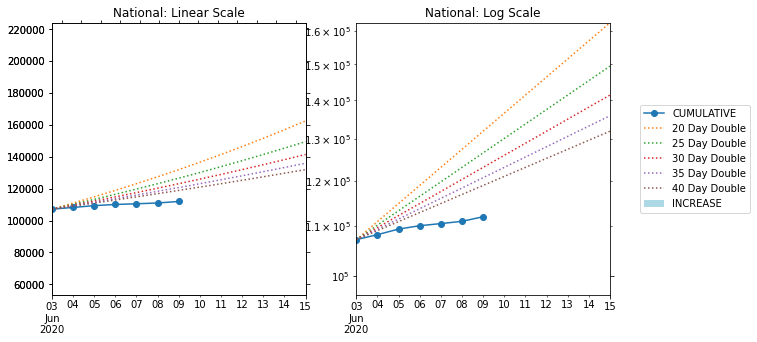

In [0]:
"""

K, so this got a bit long but I'm combining it with the function call, just setting the DEATH_CUTOFF to
1000 as threshhold here which gets used below

"""
DEATH_CUTOFF = 1000

import matplotlib.pyplot as plt
import datetime as dt, numpy as np, pandas as pd, os

us_deaths = pd.DataFrame()
state_deaths = pd.DataFrame()

# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"


tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

us_deaths.loc[x[:-4], "CUMULATIVE"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
state_deaths[x[:-4]] =tmp[tmp["Country/Region"] == "US"].groupby('Province/State').sum()["Deaths"]

for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
    if not x.endswith("2020.csv"):
        continue
    try:
      tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
    except:
      pass
    tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

    us_deaths.loc[x[:-4], "CUMULATIVE"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
    state_deaths[x[:-4]] =tmp[tmp["Country/Region"] == "US"].groupby('Province/State').sum()["Deaths"]

us_deaths.sort_index(inplace=True)
us_deaths.index = pd.to_datetime(us_deaths.index)

state_deaths = state_deaths[sorted([x for x in state_deaths.columns])].fillna(0)

td = us_deaths[-7:].T

testing = td.copy()

#Set up to go a few days into the future
maxDate = td.columns.max()
try:
  for i in range(1,7):
      td[str(maxDate + dt.timedelta(days=i))] = np.NaN
except:
  pass
td = td.T

td.index = pd.to_datetime(td.index)

td["day"] = range(len(td))


"""
Figure out math for exponents for exponential growth
"""

days = pd.DataFrame()
days["d"] = [20, 25,30,35, 40]
#daily rate to double every x days
days["r"] = days.d.apply(lambda x: 2**(1/(x)))

#Give value of expected value along each exponential for doubling period
for i in range(len(days)):
  td["{} Day Double".format(days["d"][i])] = td["day"].apply(lambda x: td.CUMULATIVE[0] *(days.r[i]**x))

#set up plots
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,5), facecolor="w")


styles = ["o-"] + [":" for i in range(len(days))]
td[[x for x in td.columns if x != "day"]].plot(style=styles, title="National: Linear Scale", ax = ax1)
ax1Max = td["CUMULATIVE"].max()
ax1Min = td["CUMULATIVE"].min()
total_max = td.max().max()

td[[x for x in td.columns if x != "day"]].plot(style=styles, title="National: Log Scale", ax = ax2)
#fulocs, fulabels = ax2.yticks()

ax1.set_ylim((ax1Min/2, ax1Max*2))
ax1.yaxis.tick_left()
ax1.yaxis.set_ticks_position('both')

ax2.set_ylim((ax1Min*.9, total_max))
#ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')

#shinanigans to make these plot together with bar

td = td.diff()[["CUMULATIVE"]].rename(columns={"CUMULATIVE":"INCREASE"})
td.index = pd.to_datetime(td.index)
#td.loc()[td.index[0], "ACTUAL CHANGE"] = 0
td.fillna(0, inplace=True)


ax1tmp = ax1.twiny()
td.plot(kind='bar', color="lightblue", ax=ax1tmp)
ax1tmp.set_xticklabels([])


#ax2.set_ylim(20)
ax2.set_yscale("log")
#ax2tmp = ax2.twiny()
#td.plot(kind='bar', color="lightblue", ax=ax2tmp)
#ax2tmp.set_xticklabels([])
#ax2tmp.yaxis.set_ticks_position("none")

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax1tmp.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))

#ax2tmp.get_legend().remove()

#shinanigans done

ax1tmp.get_legend().remove()
ax1.get_legend().remove()

#US Data - Moving Weekly Change

2020-06-10 16:06:33.929878
06-09-2020.csv


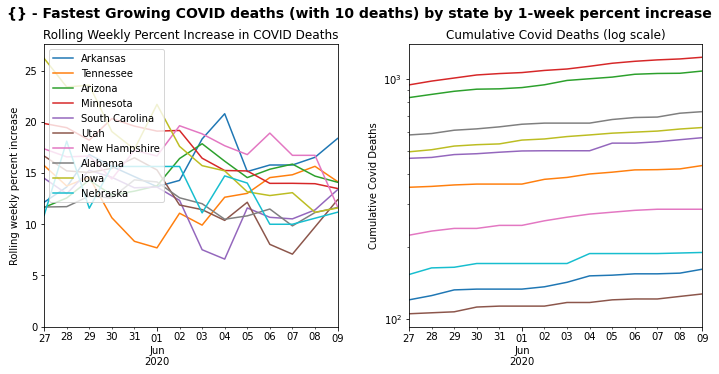

In [0]:
us_deaths = pd.DataFrame()
state_deaths = pd.DataFrame()

# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"

tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

us_deaths.loc[x[:-4], "CUMULATIVE"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
state_deaths[x[:-4]] =tmp[tmp["Country/Region"] == "US"].groupby('Province/State').sum()["Deaths"]

for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
    if not x.endswith("2020.csv"):
        continue
    try:
      tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
    except:
      pass
    tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

    us_deaths.loc[x[:-4], "CUMULATIVE"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
    state_deaths[x[:-4]] =tmp[tmp["Country/Region"] == "US"].groupby('Province/State').sum()["Deaths"]

us_deaths.sort_index(inplace=True)
us_deaths.index = pd.to_datetime(us_deaths.index)

state_deaths = state_deaths[sorted([x for x in state_deaths.columns])].fillna(0)
tmp = state_deaths.T

fig, [ax, ax1] = plt.subplots(nrows=1, ncols=2, figsize=(10,5), facecolor="w")


"""
This section goes and pulls states with more deaths than the cutoff for today
"""
# establishes metric for 'at least xx deaths"
death_cutoff = 10

weekly_increases = []
state_dfs = {}
for state in tmp.columns:
  if tmp[[state]][state].max() < death_cutoff: #only checking states with at least date_cutoff deaths; otherwise just noise
    continue
  state_dfs[state] = tmp[[state]]
  state_dfs[state].index = pd.to_datetime(state_dfs[state].index)
  state_dfs[state]["WeekPrior"] = state_dfs[state][state].shift(7)
  state_dfs[state]["WeekPercentIncrease"] = 100*(state_dfs[state][state] - state_dfs[state]["WeekPrior"])/state_dfs[state]["WeekPrior"]
  state_dfs[state].replace(np.inf, 0, inplace=True)
  state_dfs[state].fillna(0, inplace=True)
  weekly_increases.append((state_dfs[state]["WeekPercentIncrease"][-1], state))
  

max_percent_increase = -1
for _, state in sorted(weekly_increases, reverse=True)[:10]:
  state_dfs[state][-14:]["WeekPercentIncrease"].plot(ax=ax, label=state)
  state_dfs[state][-14:][state].plot(ax=ax1, label=state, logy=True)

  if state_dfs[state][-14:]["WeekPercentIncrease"][-1] > max_percent_increase:
    max_percent_increase = state_dfs[state][-14:]["WeekPercentIncrease"][-1]

ax.set_ylim(0, max_percent_increase*1.5)

ax.legend(loc="upper left")

ax.set_ylabel("Rolling weekly percent increase")
ax1.set_ylabel("Cumulative Covid Deaths")

ax.set_title("Rolling Weekly Percent Increase in COVID Deaths")
ax1.set_title("Cumulative Covid Deaths (log scale)")


fig.suptitle("{} - Fastest Growing COVID deaths (with " + str(death_cutoff) + " deaths) by state by 1-week percent increase".format(us_deaths.index.max().strftime("%m-%d-%Y")), y=1.03, fontsize=14, weight="bold")

fig.tight_layout()

plt.show()



In [0]:
max_deaths

30458.0

Did I screw something up? let me know at brockman@email.arizona.edu

2020-06-10 16:06:37.434772
06-09-2020.csv


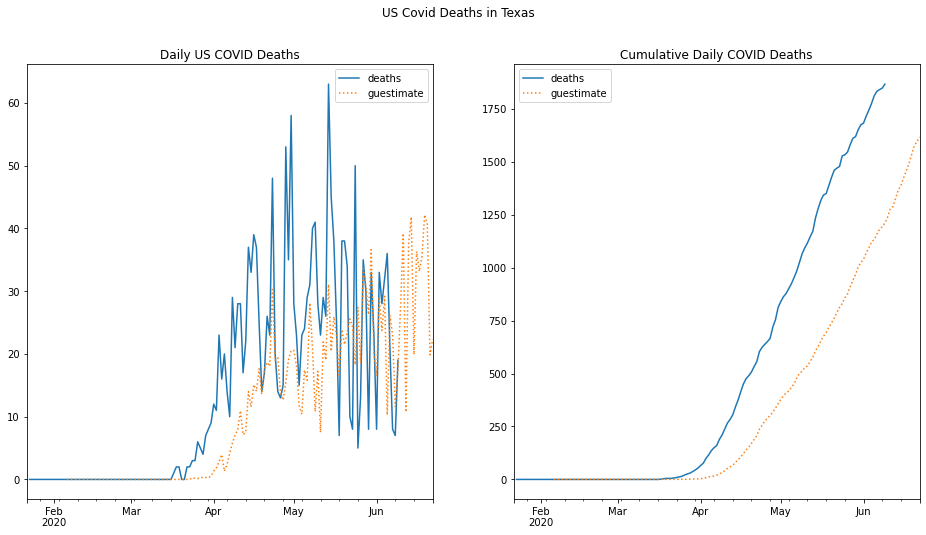

,deaths,guestimate
2020-06-09,1867.0,1210.804528
2020-06-10,NaN,1238.562270
2020-06-11,NaN,1277.765848
2020-06-12,NaN,1288.471197
2020-06-13,NaN,1326.003387
2020-06-14,NaN,1367.830410
2020-06-15,NaN,1387.738973
2020-06-16,NaN,1424.065225
2020-06-17,NaN,1457.217954
2020-06-18,NaN,1492.719090


In [0]:
import os

df = pd.DataFrame()

# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"


tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

targets = ["Texas"]

tmp = tmp[tmp["Province/State"].isin(targets)]

df.loc[x[:-4], "deaths"] = tmp[(tmp["Country/Region"] == "US")]["Deaths"].sum()
df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()


for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
  if not x.endswith("2020.csv"):
      continue
  try:
    tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
  except:
    pass
  tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

  tmp = tmp[tmp["Province/State"].isin(targets)]

  df.loc[x[:-4], "deaths"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
  df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()

df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

tmp = df.copy()


my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]


daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]].plot(ax=ax1, style=["-", ":"], title="Daily US COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("US Covid Deaths in {}".format(";".join(targets)))

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

In [0]:
print("Days Lag:{}\nRatio:{}".format(max_correlation_days_lag,mean_ratio))


Days Lag:14
Ratio:0.021156815102819727


2020-06-10 16:06:40.011780
06-09-2020.csv


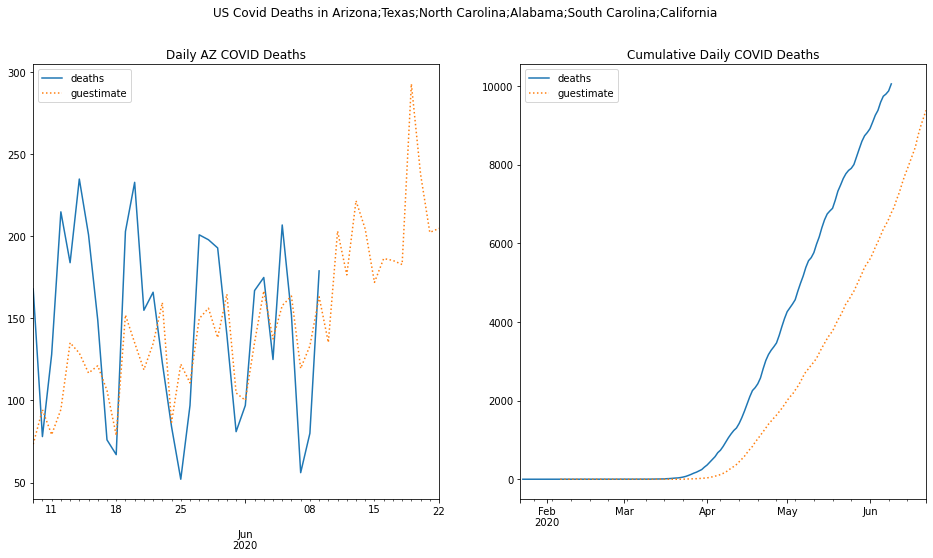

,deaths,guestimate
2020-06-09,10053.0,6774.201579
2020-06-10,NaN,6909.654160
2020-06-11,NaN,7112.938876
2020-06-12,NaN,7289.520170
2020-06-13,NaN,7511.282566
2020-06-14,NaN,7715.776950
2020-06-15,NaN,7887.791747
2020-06-16,NaN,8074.322561
2020-06-17,NaN,8259.704190
2020-06-18,NaN,8442.606000


In [0]:
import os

df = pd.DataFrame()
# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"

tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

targets = ["Arizona", "Texas", "North Carolina", 'Alabama', 'South Carolina', 'California']

tmp = tmp[tmp["Province/State"].isin(targets)]

df.loc[x[:-4], "deaths"] = tmp[(tmp["Country/Region"] == "US")]["Deaths"].sum()
df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()


for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
  if not x.endswith("2020.csv"):
      continue
  try:
    tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
  except:
    pass
  tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

  tmp = tmp[tmp["Province/State"].isin(targets)]

  df.loc[x[:-4], "deaths"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
  df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()

df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

tmp = df.copy()


my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]


daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]][-45:].plot(ax=ax1, style=["-", ":"], title="Daily AZ COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("US Covid Deaths in {}".format(";".join(targets)))

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

Colorado's wierd, it doesn't like this method; I take that back, it's settled now an working-ish

2020-06-10 16:06:42.548333
06-09-2020.csv


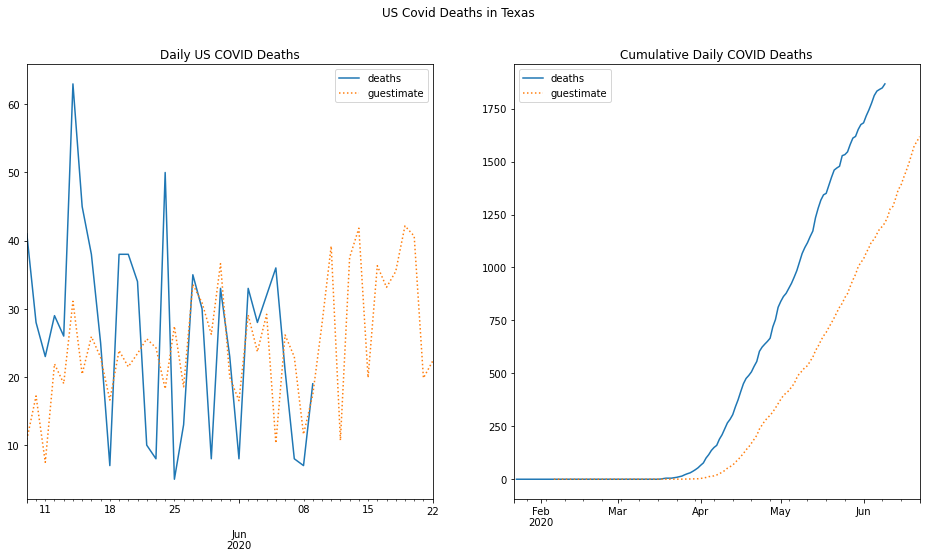

,deaths,guestimate
2020-06-09,1867.0,1210.804528
2020-06-10,NaN,1238.562270
2020-06-11,NaN,1277.765848
2020-06-12,NaN,1288.471197
2020-06-13,NaN,1326.003387
2020-06-14,NaN,1367.830410
2020-06-15,NaN,1387.738973
2020-06-16,NaN,1424.065225
2020-06-17,NaN,1457.217954
2020-06-18,NaN,1492.719090


In [0]:
import os

df = pd.DataFrame()
# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"



tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

targets = ["Texas"]

tmp = tmp[tmp["Province/State"].isin(targets)]

df.loc[x[:-4], "deaths"] = tmp[(tmp["Country/Region"] == "US")]["Deaths"].sum()
df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()


for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
  if not x.endswith("2020.csv"):
      continue
  try:
    tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
  except:
    pass
  tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

  tmp = tmp[tmp["Province/State"].isin(targets)]

  df.loc[x[:-4], "deaths"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
  df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()

df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

tmp = df.copy()


my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]


daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]][-45:].plot(ax=ax1, style=["-", ":"], title="Daily US COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("US Covid Deaths in {}".format(";".join(targets)))

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

2020-06-10 16:06:45.059329
06-09-2020.csv


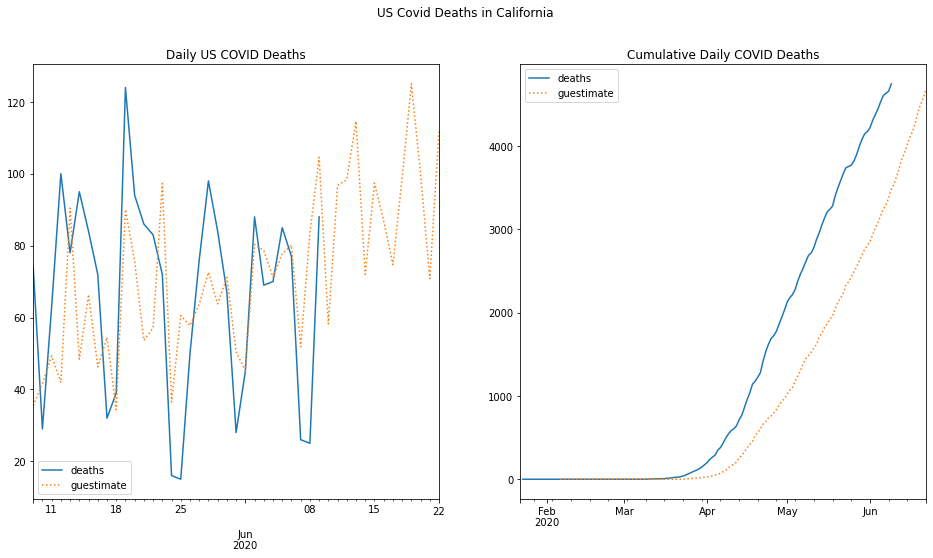

,deaths,guestimate
2020-06-09,4745.0,3480.084993
2020-06-10,NaN,3538.315762
2020-06-11,NaN,3635.063574
2020-06-12,NaN,3733.422099
2020-06-13,NaN,3848.027814
2020-06-14,NaN,3920.019672
2020-06-15,NaN,4017.432779
2020-06-16,NaN,4104.341237
2020-06-17,NaN,4179.029288
2020-06-18,NaN,4277.772983


In [0]:
import os

df = pd.DataFrame()

# Get Yesterday's data drop
print(dt.datetime.now())
xx = dt.datetime.now() - timedelta(days=1)
print(xx.strftime("%m-%d-%Y") + ".csv")
x = xx.strftime("%m-%d-%Y") + ".csv"

# can override with a specific data drop date
# x = "06-09-2020.csv"



tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

targets = ["California"]

tmp = tmp[tmp["Province/State"].isin(targets)]

df.loc[x[:-4], "deaths"] = tmp[(tmp["Country/Region"] == "US")]["Deaths"].sum()
df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()


for x in os.listdir("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"):
  if not x.endswith("2020.csv"):
      continue
  try:
    tmp = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/" + x)
  except:
    pass
  tmp.rename(columns={"Country_Region":"Country/Region", "Province_State":"Province/State"}, inplace=True)

  tmp = tmp[tmp["Province/State"].isin(targets)]

  df.loc[x[:-4], "deaths"] = tmp[tmp["Country/Region"] == "US"]["Deaths"].sum()
  df.loc[x[:-4], "confirmed"] = tmp[tmp["Country/Region"] == "US"]["Confirmed"].sum()

df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

tmp = df.copy()


my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]


daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)


ratios = [((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)]
mean_ratio = np.mean([ratio for ratio in ratios[-14:] if ratio != np.inf])

daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]][-45:].plot(ax=ax1, style=["-", ":"], title="Daily US COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("US Covid Deaths in {}".format(";".join(targets)))

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

# What about the UK?

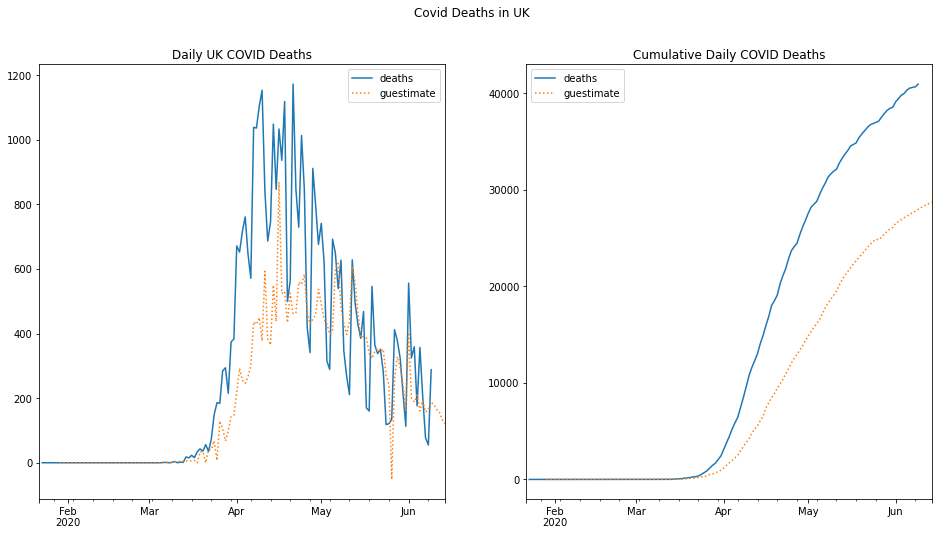

,deaths,guestimate
2020-06-09,40968.0,27982.027703
2020-06-10,NaN,28161.995308
2020-06-11,NaN,28326.642287
2020-06-12,NaN,28481.838231
2020-06-13,NaN,28613.854268
2020-06-14,NaN,28734.529063


In [0]:
deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

deaths = deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
confirmed = confirmed.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

deaths = deaths.T
confirmed = confirmed.T

nations = {}
for nation in deaths.columns:
  nations[nation] = deaths[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed[nation]


tmp = nations["United Kingdom"][["deaths", "confirmed"]]
tmp.index = pd.to_datetime(tmp.index)

my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]

daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]].plot(ax=ax1, style=["-", ":"], title="Daily UK COVID Deaths")

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("Covid Deaths in UK")

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

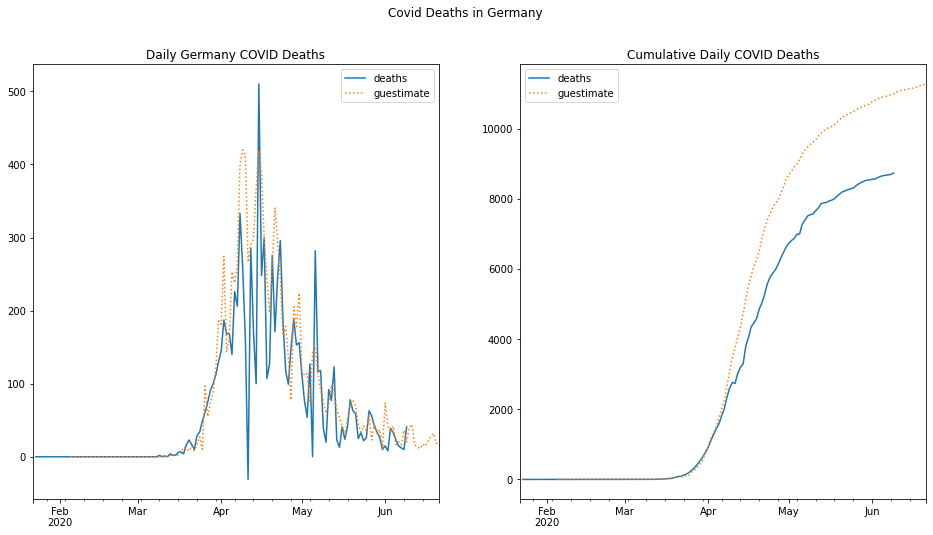

,deaths,guestimate
2020-06-09,8736.0,10993.093115
2020-06-10,NaN,11033.789434
2020-06-11,NaN,11077.755992
2020-06-12,NaN,11093.925512
2020-06-13,NaN,11107.309271
2020-06-14,NaN,11118.452311
2020-06-15,NaN,11135.711911
2020-06-16,NaN,11150.367430
2020-06-17,NaN,11171.623990
2020-06-18,NaN,11198.997109


In [0]:
deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

deaths = deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
confirmed = confirmed.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

deaths = deaths.T
confirmed = confirmed.T

nations = {}
for nation in deaths.columns:
  nations[nation] = deaths[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed[nation]


trgCounty = "Germany"

tmp = nations[trgCounty][["deaths", "confirmed"]]
tmp.index = pd.to_datetime(tmp.index)

my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]

daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]].plot(ax=ax1, style=["-", ":"], title="Daily {} COVID Deaths".format(trgCounty))

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("Covid Deaths in {}".format(trgCounty))

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])

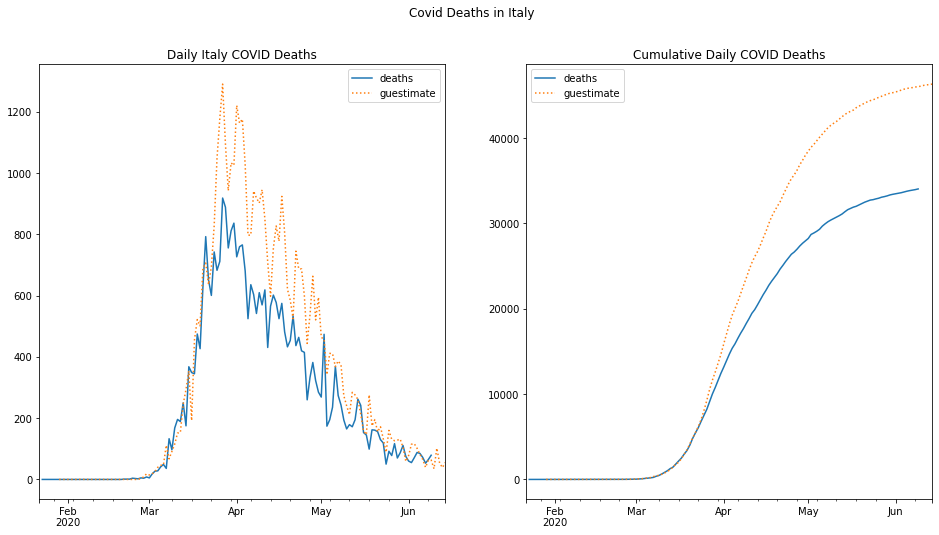

,deaths,guestimate
2020-06-09,34043.0,46045.630803
2020-06-10,NaN,46080.484617
2020-06-11,NaN,46182.486177
2020-06-12,NaN,46235.653014
2020-06-13,NaN,46274.445113
2020-06-14,NaN,46329.581091


In [0]:
deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

deaths = deaths.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
confirmed = confirmed.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

deaths = deaths.T
confirmed = confirmed.T

nations = {}
for nation in deaths.columns:
  nations[nation] = deaths[[nation]]
  nations[nation].columns = ["deaths"]
  nations[nation]["confirmed"] = confirmed[nation]


trgCounty = "Italy"

tmp = nations[trgCounty][["deaths", "confirmed"]]
tmp.index = pd.to_datetime(tmp.index)

my_range = 30

corr_tmp = (tmp.diff())
for i in range(my_range):
  corr_tmp["deaths_lag_{}".format(i)] = corr_tmp["deaths"].shift(i).fillna(0)
  corr_tmp["confirmed_lag_{}".format(i)] = corr_tmp["confirmed"].shift(i).fillna(0)


corr_df = corr_tmp.corr()
death_corrs = pd.DataFrame()
confirmed_corrs = pd.DataFrame()

for i in range(my_range):
  death_corrs.loc()[i, "deaths"] = corr_df.loc()["deaths", "deaths_lag_{}".format(i)]
  death_corrs.loc()[i, "confirmed"] = corr_df.loc()["deaths", "confirmed_lag_{}".format(i)]

max_correlation_days_lag = death_corrs[["confirmed"]][2:].idxmax()[0]

daily_deaths = tmp.diff()
daily_deaths.index = pd.to_datetime(daily_deaths.index)

mean_ratio = np.mean([((daily_deaths["deaths"][-i])/(daily_deaths["confirmed"][-i - max_correlation_days_lag+1])) for i in range(1,21)])
daily_deaths["guestimate"] =  mean_ratio*daily_deaths["confirmed"].shift(max_correlation_days_lag)
startForecast = daily_deaths.index.max()
cvals = daily_deaths.confirmed[-max_correlation_days_lag:]
for forecast in range(1,max_correlation_days_lag):
  daily_deaths.at[startForecast + dt.timedelta(days=forecast), "guestimate"] = mean_ratio * cvals[forecast-max_correlation_days_lag-1]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16,8), facecolor="w")
daily_deaths[["deaths", "guestimate"]].plot(ax=ax1, style=["-", ":"], title="Daily {} COVID Deaths".format(trgCounty))

#(mean_ratio * daily_deaths["confirmed"]).shift(7).plot(ax=ax1)

daily_deaths[["deaths", "guestimate"]].cumsum().plot(ax=ax2, style=["-", ":"], title="Cumulative Daily COVID Deaths")

fig.suptitle("Covid Deaths in {}".format(trgCounty))

plt.show()

display(daily_deaths[["deaths","guestimate"]].cumsum()[-max_correlation_days_lag:])